In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [9]:
import pandas as pd
df = pd.read_csv("Iris_new.csv")
print(df.head())
df.isna()
df.isna().count()

   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   

   Petal width (in cm)        Class  
0                  0.2  Iris-setosa  
1                  0.2  Iris-setosa  
2                  0.2  Iris-setosa  
3                  0.2  Iris-setosa  
4                  0.2  Iris-setosa  


Sepal Length (in cm)    150
Sepal Width in (cm)     150
Petal length (in cm)    150
Petal width (in cm)     150
Class                   150
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [27]:
from   sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Class"])
le.transform(df["Class"])
##print(df["Class"])
#df.dtypes
#df['newColum']=transformed_column






array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [34]:
df.head()
print(df.corr(method ='pearson')) 

                      Sepal Length (in cm)  Sepal Width in (cm)  \
Sepal Length (in cm)              1.000000            -0.109369   
Sepal Width in (cm)              -0.109369             1.000000   
Petal length (in cm)              0.871754            -0.420516   
Petal width (in cm)               0.817954            -0.356544   

                      Petal length (in cm)  Petal width (in cm)  
Sepal Length (in cm)              0.871754             0.817954  
Sepal Width in (cm)              -0.420516            -0.356544  
Petal length (in cm)              1.000000             0.962757  
Petal width (in cm)               0.962757             1.000000  


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [30]:
df.var()<0.1
#df.drop(if(df.var()))

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

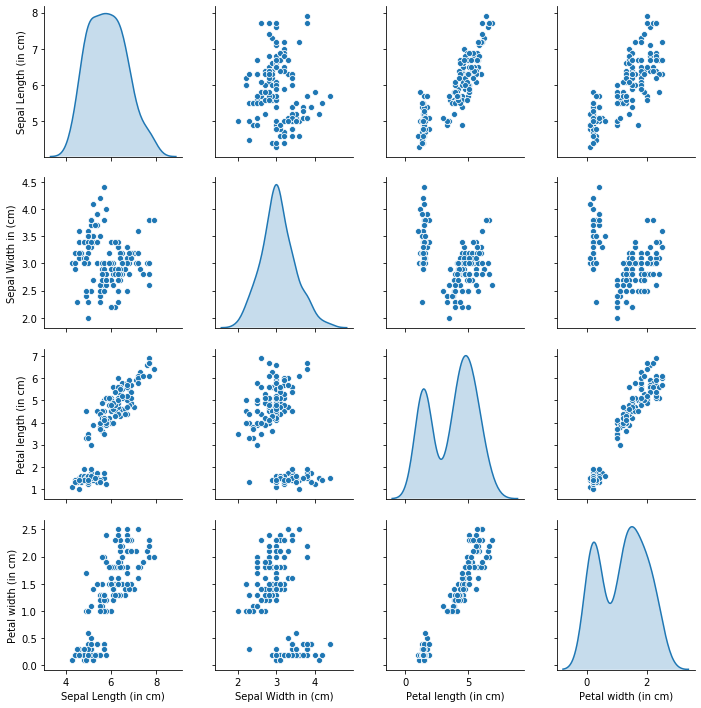

In [32]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = df.drop(columns= "Class")

y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
#print(X_test)



#print(y_test.head())
#print(y_train.head())


[[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]
 [-0.80392556 -0.82150798  0.04735245  0.21876435]
 [-0.21352735  1.73601687 -1.19037495 -1.20374277]
 [ 0.14071157 -0.82150798  0.72247648  0.47740201]
 [ 0.02263193 -0.12400121  0.21613346  0.34808318]
 [-0.09544771 -1.05401024  0.10361279 -0.03987331]
 [ 1.0853487  -0.12400121  0.94751783  1.12399616]
 [-1.39432376  0.34100331 -1.41541629 -1.3330616 ]
 [ 1.20342834  0.10850105  0.72247648  1.38263382]
 [-1.04008484  1.03851009 -1.24663528 -0.81578628]
 [-0.56776627  1.50351461 -1.30289562 -1.3330616 ]
 [-1.04008484 -2.4490238  -0.1776889  -0.29851096]
 [ 0.73110978 -0.12400121  0.94751783  0.73603967]
 [ 0.96726906  0.57350557  1.0600385   1.64127148]
 [ 0.14071157 -1.98401928  0.66621615  0.34808318]
 [ 0.96726906 -1.2865125   1.11

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
res= []

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
test_pred = knn.predict(X_train)
print(accuracy_score(y_train,test_pred))


0.9666666666666667


accuracy score for trained model for 1 th value 1.0
accuracy score for test model 0.9666666666666667
accuracy score for trained model for 2 th value 0.975
accuracy score for test model 0.9666666666666667
accuracy score for trained model for 3 th value 0.9666666666666667
accuracy score for test model 0.9666666666666667
accuracy score for trained model for 4 th value 0.9666666666666667
accuracy score for test model 0.9666666666666667
accuracy score for trained model for 5 th value 0.9583333333333334
accuracy score for test model 1.0
accuracy score for trained model for 6 th value 0.9583333333333334
accuracy score for test model 1.0
accuracy score for trained model for 7 th value 0.9666666666666667
accuracy score for test model 1.0
accuracy score for trained model for 8 th value 0.9666666666666667
accuracy score for test model 1.0
accuracy score for trained model for 9 th value 0.9666666666666667
accuracy score for test model 1.0
accuracy score for trained model for 10 th value 0.96666666

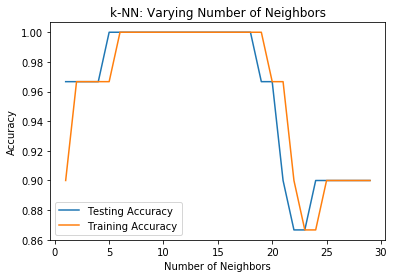

In [65]:
import numpy as np
res_train= []
res_test= []
neighbors = np.arange(1, 30)
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_pred = knn.predict(X_train)
    print("accuracy score for trained model for {0} th value {1}".format(i,accuracy_score(y_train,test_pred)))
    res_train.append(accuracy_score(y_test,test_pred1))
    test_pred1 = knn.predict(X_test)
    print("accuracy score for test model",accuracy_score(y_test,test_pred1))
    res_test.append(accuracy_score(y_test,test_pred1))
    
print("K value for train data",res_train)
print("K value for test data",res_test)

from matplotlib import pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, res_test, label = 'Testing Accuracy')
plt.plot(neighbors, res_train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
   
    

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [100]:
MSE= []
for i in range(0,29): 
    temp= 1-res_test[i]
    MSE.append(temp)

print(MSE)
print(len(MSE))

for i in range(1,20): 
    print("Misclassification error for value {0} th value is :  {1}".format(i,MSE[i]))






[0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033333333333333326, 0.033333333333333326, 0.09999999999999998, 0.1333333333333333, 0.1333333333333333, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998]
29
Misclassification error for value 1 th value is :  0.033333333333333326
Misclassification error for value 2 th value is :  0.033333333333333326
Misclassification error for value 3 th value is :  0.033333333333333326
Misclassification error for value 4 th value is :  0.0
Misclassification error for value 5 th value is :  0.0
Misclassification error for value 6 th value is :  0.0
Misclassification error for value 7 th value is :  0.0
Misclassification error for value 8 th value is :  0.0
Misclassification error for value 9 th value is :  0.0
Misclassification error for value 10 th value is :  0.0
Miscl

In [ ]:

type(MSE)
MSE.sort()

lowest_MSE = MSE[0]
print("Lowest MSE is:",lowest_MSE)




## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

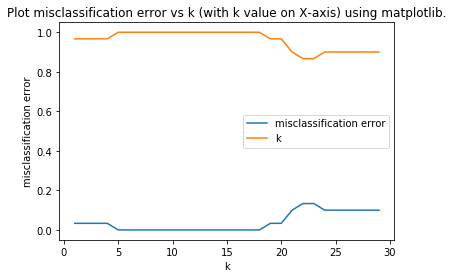

In [101]:
from matplotlib import pyplot as plt
plt.title('Plot misclassification error vs k (with k value on X-axis) using matplotlib.')
plt.plot(neighbors, MSE, label = 'misclassification error')
plt.plot(neighbors, res_test, label = 'k')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification error')
plt.show()